In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.preprocessing import Normalizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC

In [37]:
from sklearn import preprocessing

# Breast Cancer Wisconsin Dataset

In [2]:
df = pd.read_csv("datasets/breastcancer/cancer.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
len(df[df["diagnosis"] == "M"])

212

In [7]:
len(df[df["diagnosis"] == "B"])

357

# Train Test Split

In [8]:
y = df["diagnosis"].copy()
X = df.drop(["diagnosis", "Unnamed: 32", "id"], axis=1).copy()

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [11]:
len(y_test[y_test=="M"])/len(y_test)

0.3684210526315789

In [12]:
len(y_train[y_train=="M"])/len(y_train)

0.37362637362637363

# Visualize data

In [14]:
y_train_bool = y_train=="M"

y_train_num = y_train_bool.astype(int)

In [15]:
train_set = X_train.copy()
train_set["diagnosis"] = y_train_num

In [16]:
train_set.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.195451,19.216835,92.399604,661.700659,0.096467,0.104330,0.088885,0.049327,0.181007,0.062678,...,25.654857,107.862747,892.646593,0.132442,0.253392,0.269954,0.114648,0.290165,0.083539,0.373626
std,3.558848,4.300586,24.484809,357.485263,0.014212,0.052228,0.079623,0.038731,0.027222,0.007084,...,6.233926,34.102229,585.294764,0.022620,0.156561,0.205890,0.065384,0.062547,0.017727,0.484299
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.710000,16.110000,75.265000,420.400000,0.086390,0.065600,0.029195,0.020685,0.161950,0.057805,...,21.055000,84.135000,516.450000,0.116400,0.148000,0.113450,0.065360,0.251000,0.071250,0.000000
50%,13.460000,18.820000,87.160000,557.200000,0.096460,0.095090,0.061810,0.034000,0.179400,0.061660,...,25.460000,97.960000,688.900000,0.132300,0.215800,0.229800,0.099750,0.280700,0.080040,0.000000
75%,16.090000,21.680000,105.450000,798.300000,0.105400,0.129800,0.132100,0.074855,0.195300,0.066035,...,29.585000,126.100000,1091.500000,0.146350,0.333800,0.379250,0.161950,0.317100,0.092070,1.000000
max,28.110000,33.810000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f528c4ee780>,
      dtype=object)

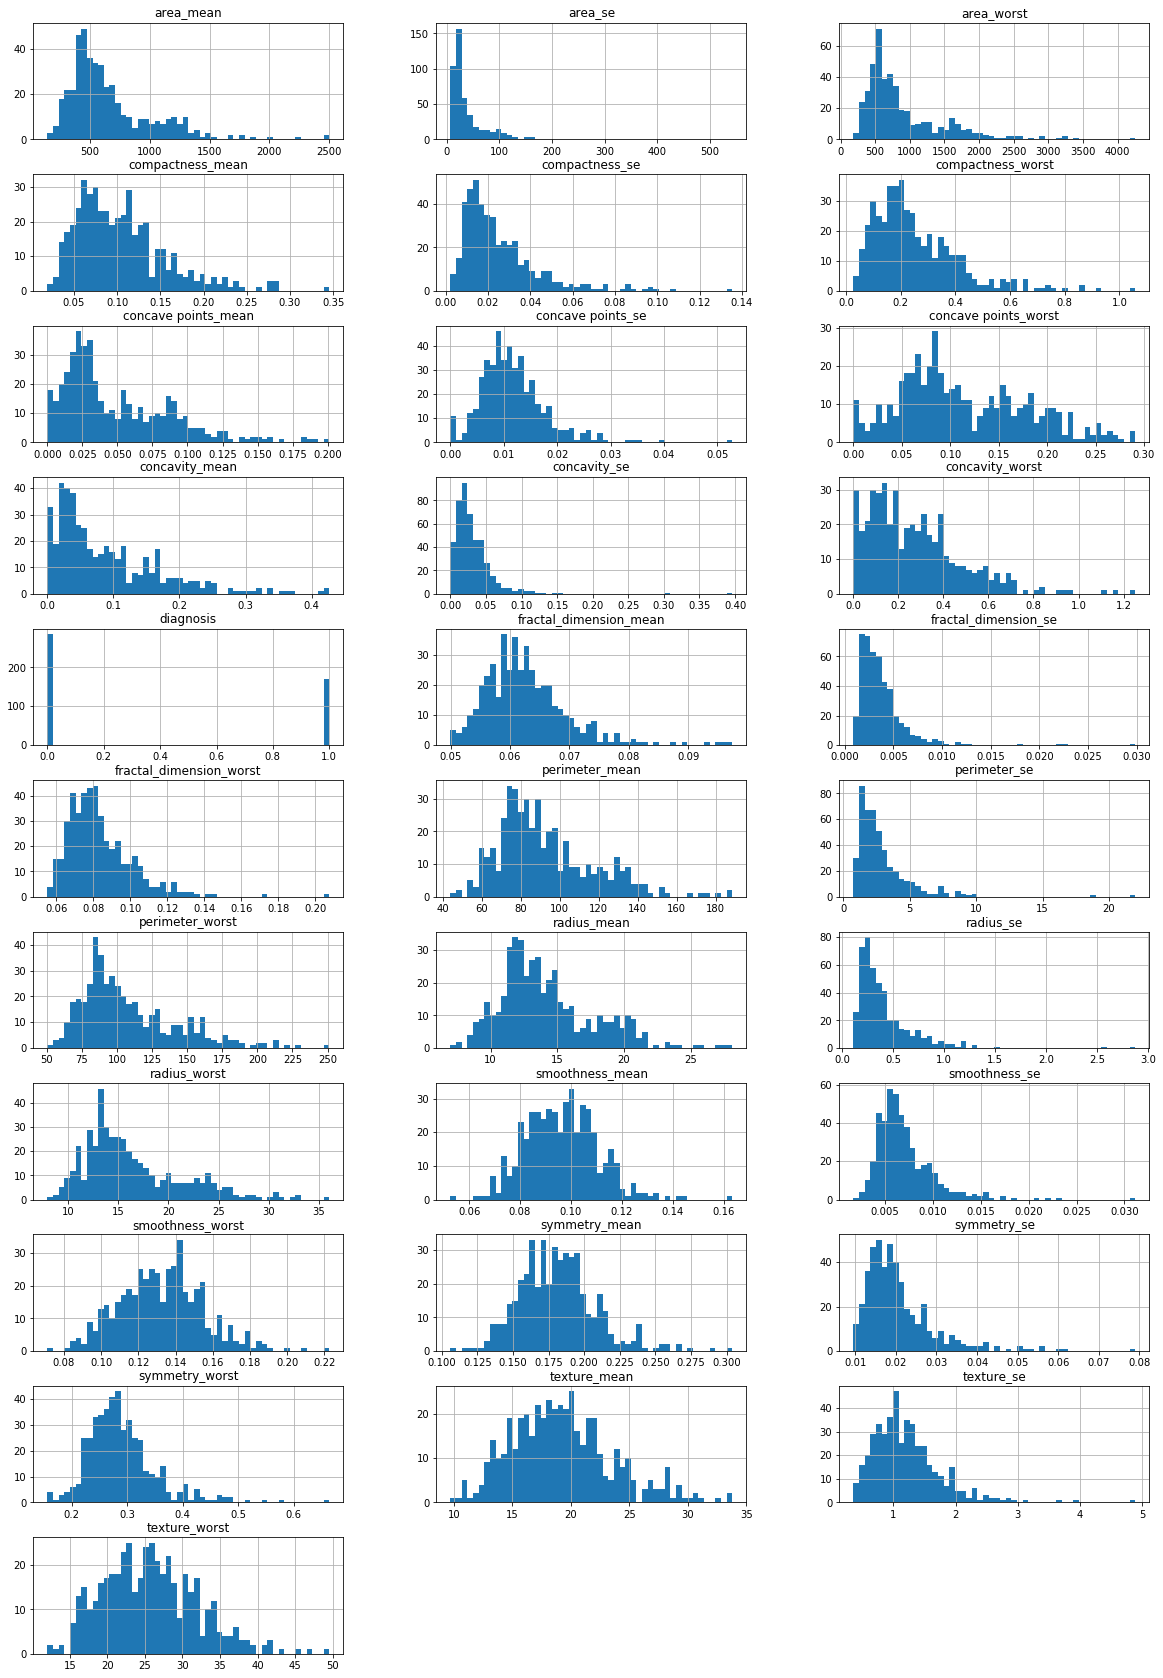

In [17]:
train_set.hist(figsize=(20,30), bins=50, layout=(11,3))

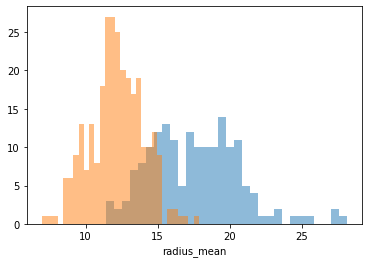

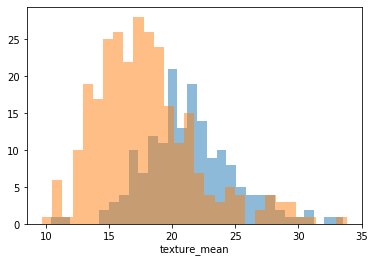

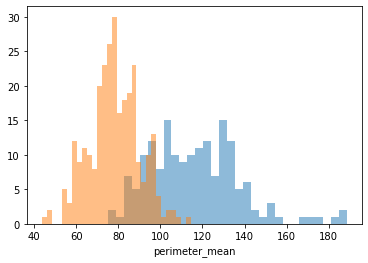

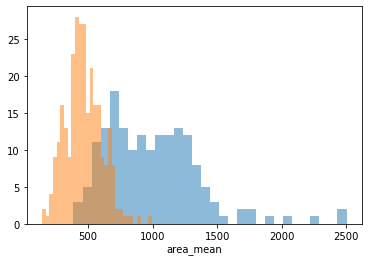

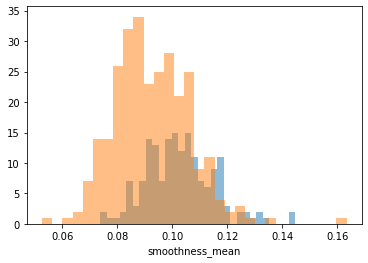

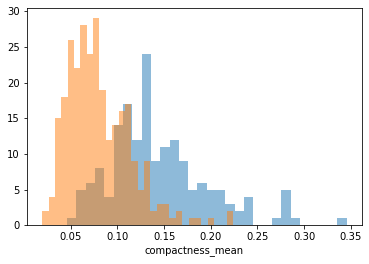

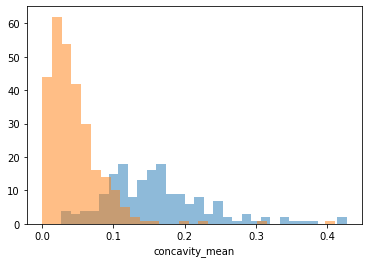

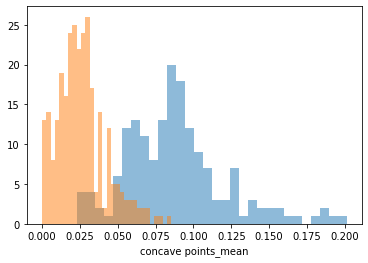

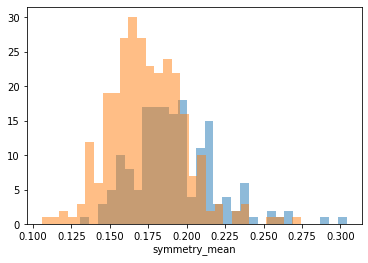

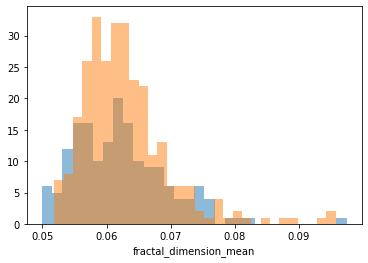

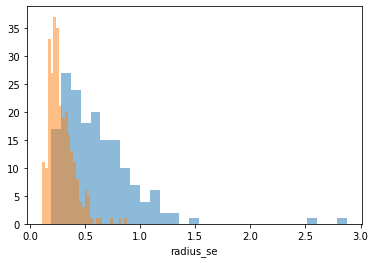

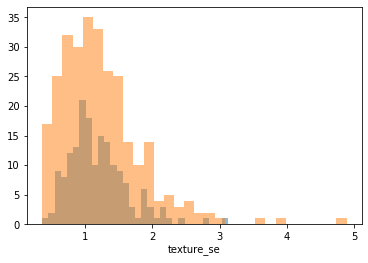

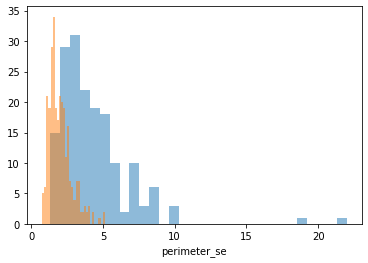

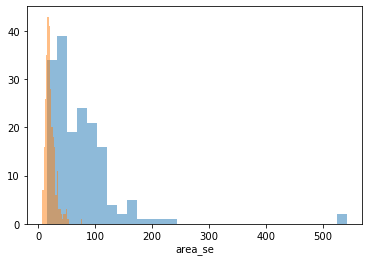

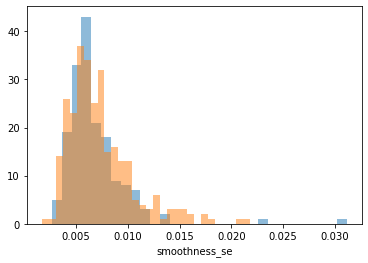

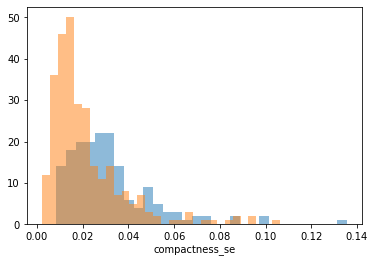

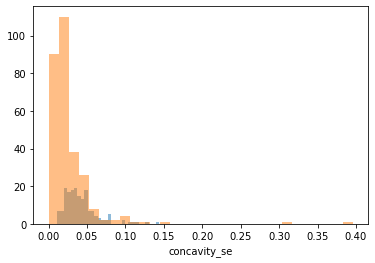

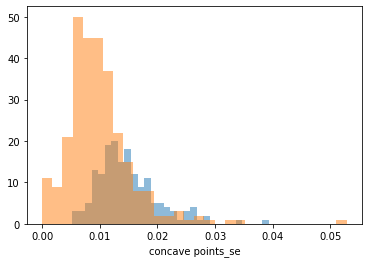

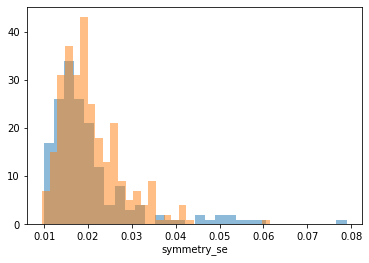

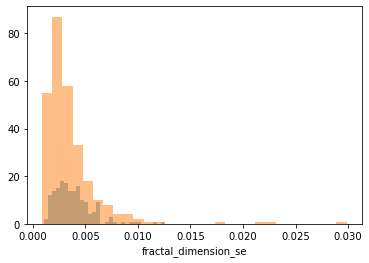

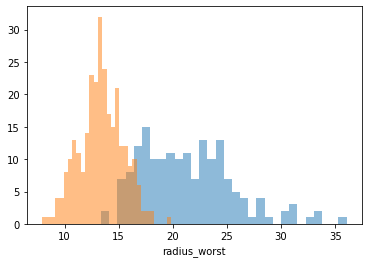

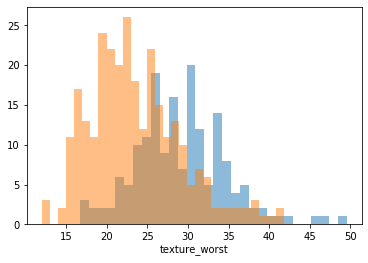

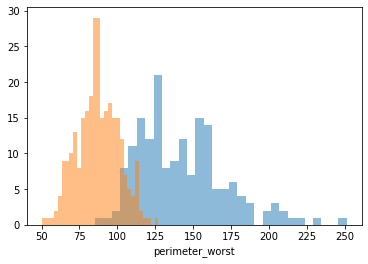

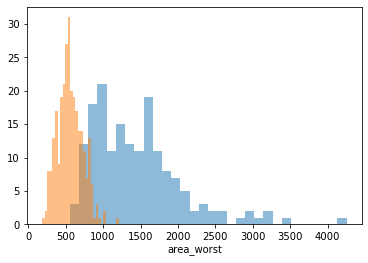

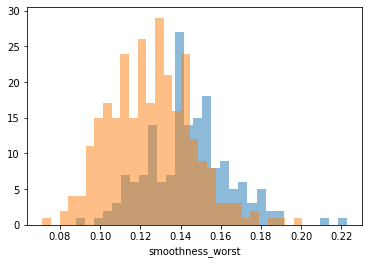

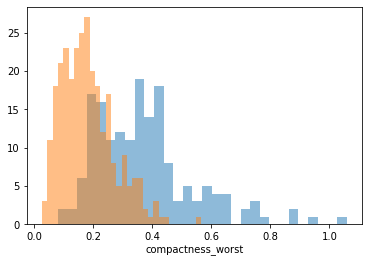

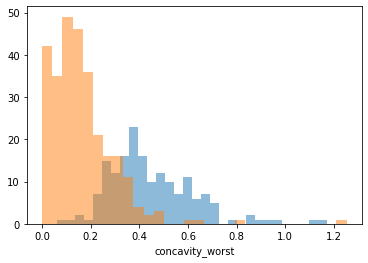

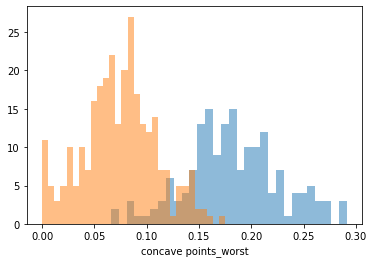

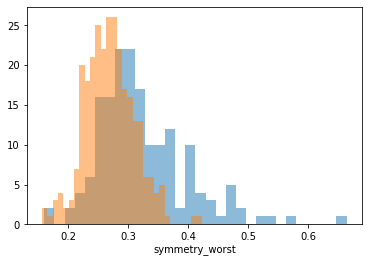

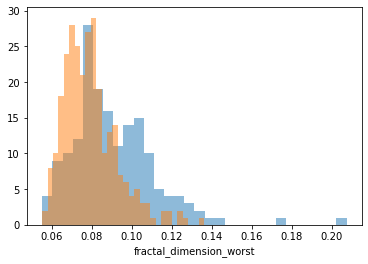

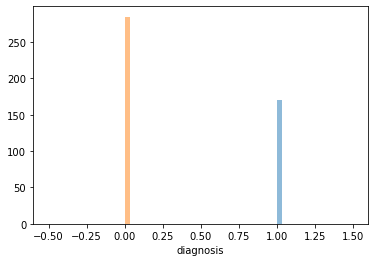

In [18]:
for i in train_set.columns:
    m = plt.hist(train_set[train_set["diagnosis"] == 1][i], bins=30, label = "Malignant", alpha=0.5)
    b = plt.hist(train_set[train_set["diagnosis"] == 0][i], bins=30, label = "Bening", alpha=0.5)
    plt.xlabel(i)
    plt.show()

In [19]:
corr_matrix = train_set.corr()
corr_matrix["diagnosis"].abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.800238
perimeter_worst            0.789450
radius_worst               0.783887
concave points_mean        0.783566
perimeter_mean             0.752135
radius_mean                0.740257
area_worst                 0.736447
area_mean                  0.715776
concavity_mean             0.703849
concavity_worst            0.672154
compactness_mean           0.593967
compactness_worst          0.592115
radius_se                  0.555804
perimeter_se               0.543825
area_se                    0.531078
texture_worst              0.442752
symmetry_worst             0.422463
smoothness_worst           0.413657
texture_mean               0.398210
concave points_se          0.385089
smoothness_mean            0.347572
symmetry_mean              0.325472
fractal_dimension_worst    0.309801
compactness_se             0.273912
concavity_se               0.242244
smoothness_se              0.076417
fractal_dimension_se       0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52597cb470>,
      dtype=object)

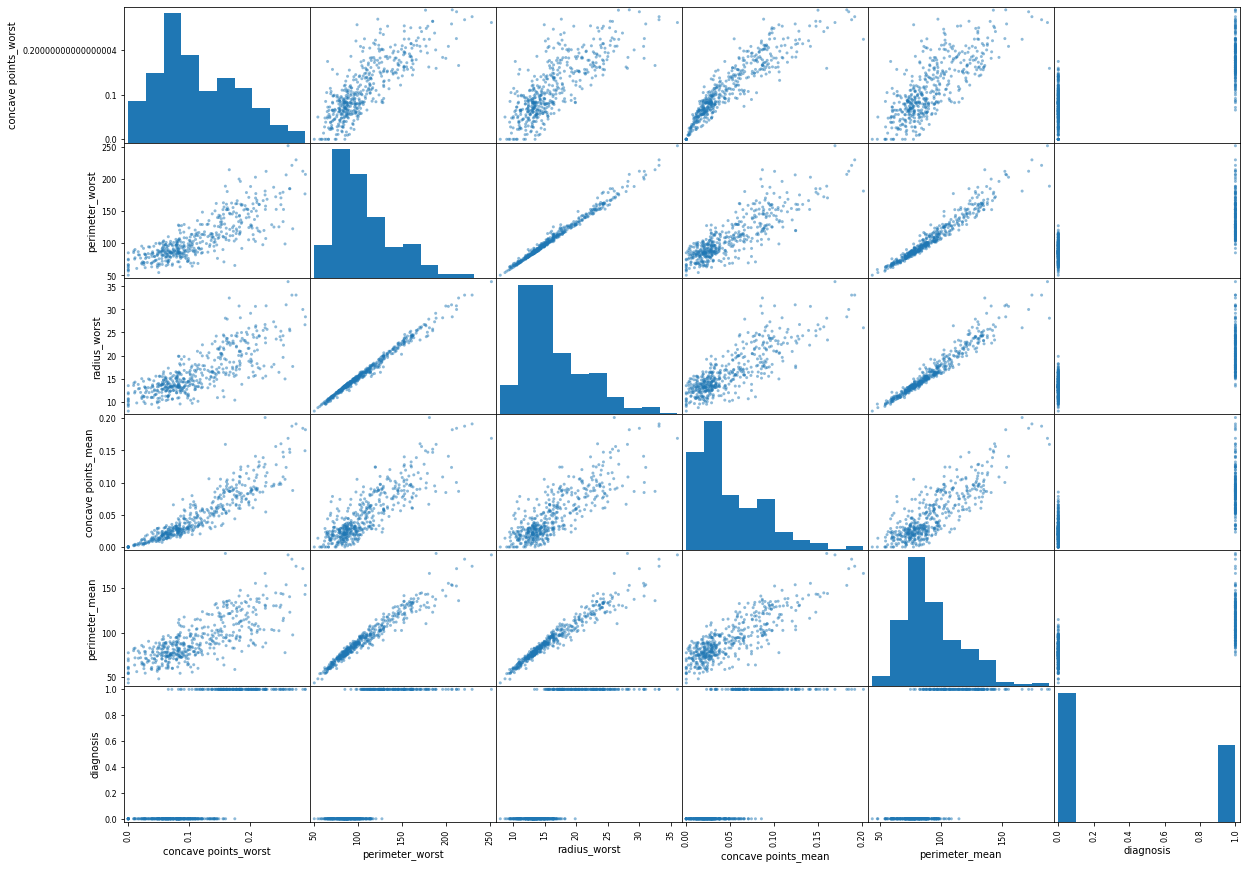

In [20]:
attributes = ["concave points_worst", "perimeter_worst", "radius_worst", "concave points_mean", "perimeter_mean", "diagnosis"]
scatter_matrix(train_set[attributes], figsize=(20, 15))

In [21]:
mean = train_set.iloc[:,1:11].to_numpy()
std = train_set.iloc[:,11:21].to_numpy()

In [22]:
worse = train_set.iloc[:,21:31].to_numpy()

## instead of mean and std calc mean+std and mean-std

In [23]:
upper_columns = pd.Series(train_set.columns[1:11]).apply(lambda x: x[:-4]+"upper")
upper = pd.DataFrame(mean+std, columns=upper_columns, index=train_set.index)

In [24]:
lower_columns = pd.Series(train_set.columns[1:11]).apply(lambda x: x[:-4]+"lower")
lower = pd.DataFrame(mean-std, columns=lower_columns, index=train_set.index)

## calc mean-worse

In [25]:
diff_cols = pd.Series(train_set.columns[1:11]).apply(lambda x: x[:-4]+"diff")
diff = pd.DataFrame(worse-mean, columns = diff_cols, index = train_set.index)

## combine everything

In [26]:
train_set_error_interval =pd.concat([lower, upper, train_set, diff], axis=1, sort=False)

In [27]:
pd.options.display.max_rows = 100

In [28]:
corr_matrix = train_set_error_interval.corr()
corr_matrix["diagnosis"].abs().sort_values(ascending=False)

diagnosis                  1.000000
radiudiff                  0.811447
concave points_worst       0.800238
concave points_lower       0.790099
perimeter_worst            0.789450
radius_worst               0.783887
radiulower                 0.783720
concave points_mean        0.783566
radiuupper                 0.782837
concavity_lower            0.771941
concave points_upper       0.766381
perimeter_upper            0.752258
perimeter_mean             0.752135
perimeter_lower            0.749153
radius_mean                0.740257
area_worst                 0.736447
area_lower                 0.719927
area_mean                  0.715776
perimeter_diff             0.713371
area_upper                 0.708351
concavity_mean             0.703849
concavity_worst            0.672154
area_diff                  0.663833
concave points_diff        0.643588
compactness_lower          0.636550
concavity_upper            0.615063
compactness_mean           0.593967
compactness_worst          0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52542c2978>,
      dtype=object)

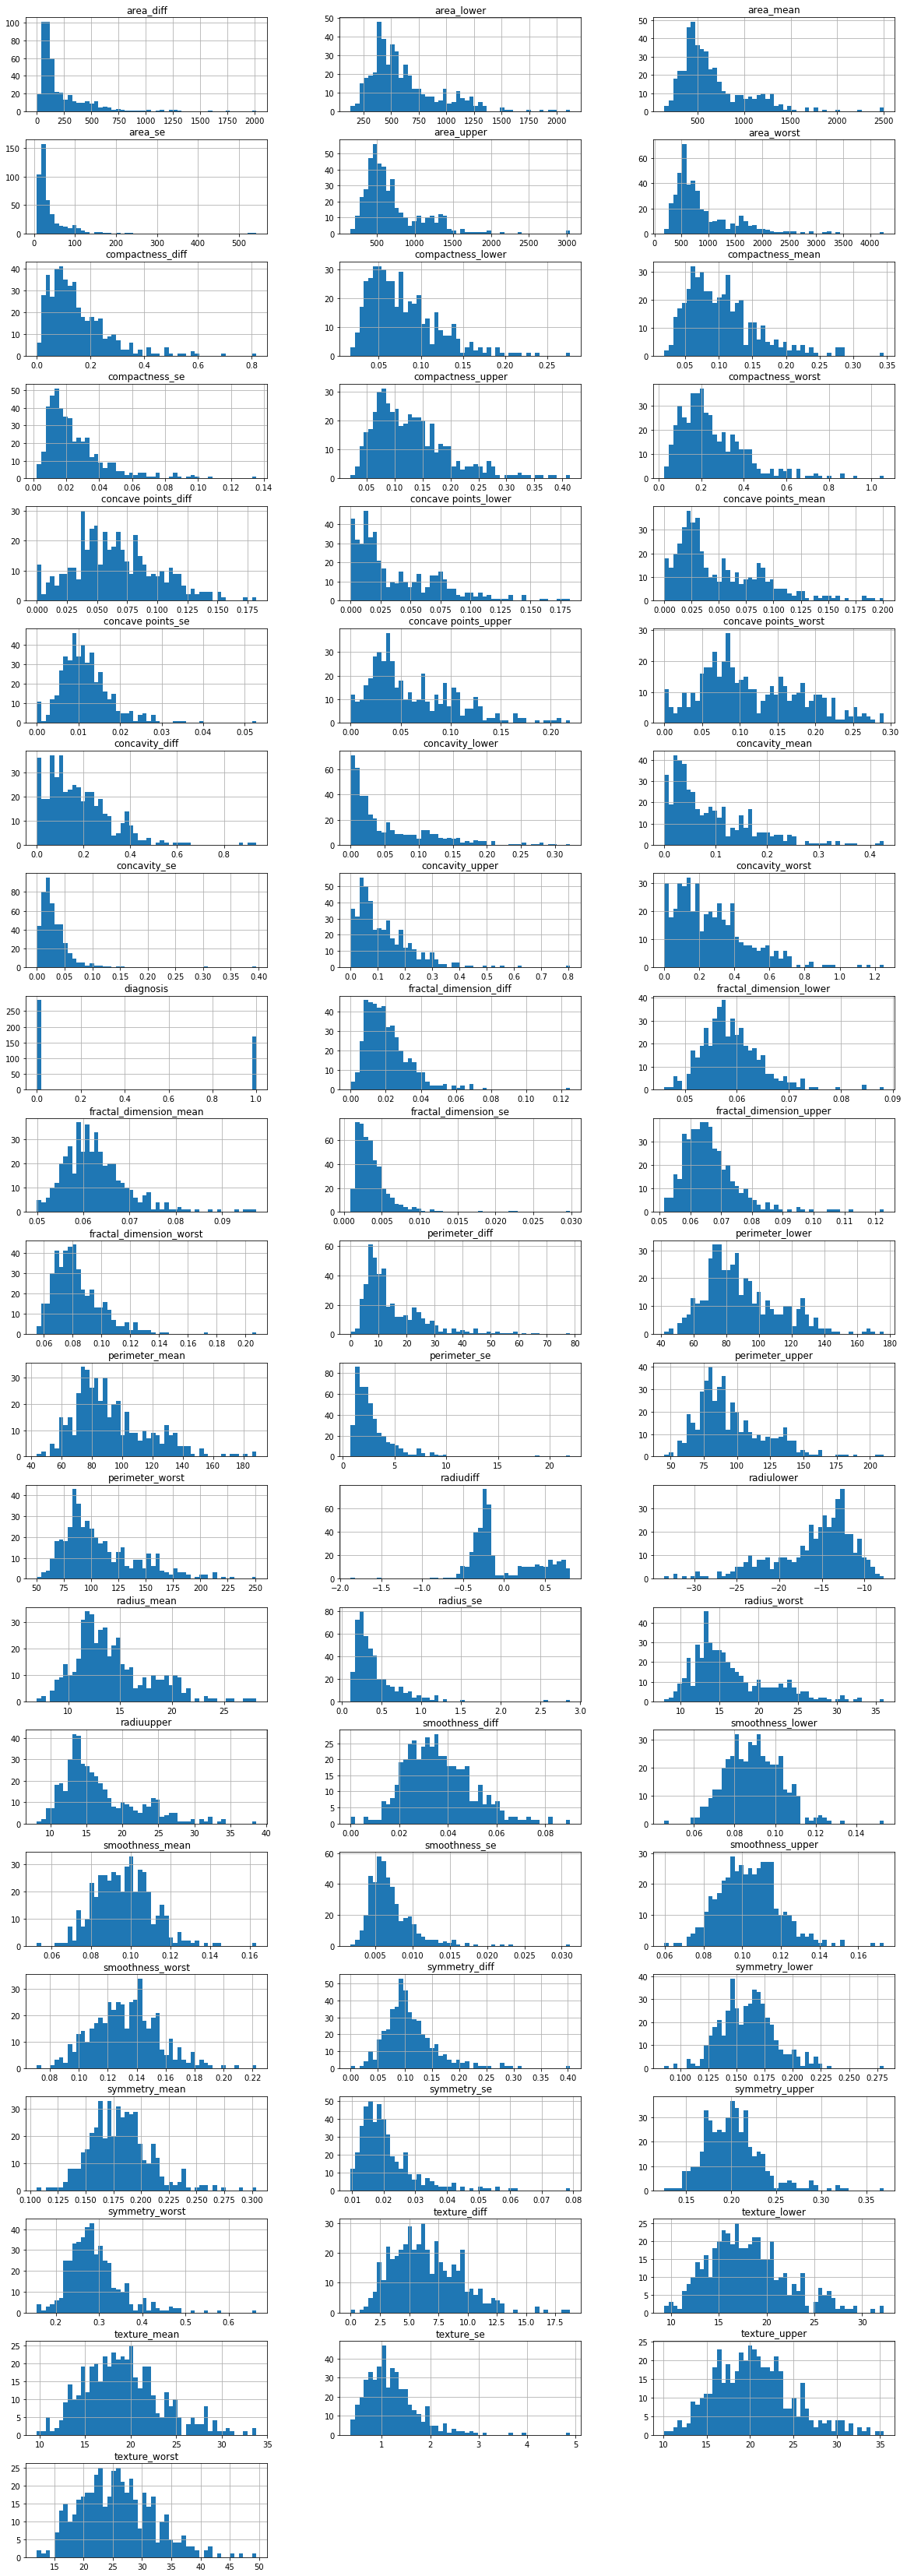

In [29]:
train_set_error_interval.hist(figsize=(20,60), bins=50, layout=(21,3))

# PCA

In [30]:
n_components = 1
pca = PCA(n_components=n_components)

In [31]:
color = train_set["diagnosis"].apply(lambda x: "red" if x==1 else "blue")

In [32]:
train_set_pca = pca.fit_transform(train_set.drop(["diagnosis"], axis=1))

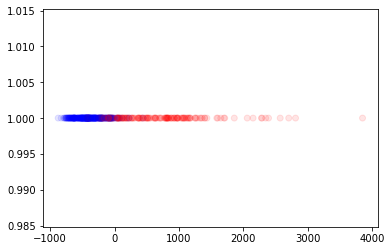

In [33]:
if n_components == 1:
    plt.scatter(train_set_pca,[1 for i in range(len(train_set_pca))], alpha=0.1, c=color)
elif n_components == 2:
    plt.scatter(train_set_pca[:,0],train_set_pca[:,1], alpha=0.1, c=color)

In [34]:
np.set_printoptions(suppress=True)

In [35]:
np.sum(pca.explained_variance_ratio_)

0.9815342734888889

# Standardization + t-SNE

In [39]:
train_set

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938,1
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031,0
544,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492,0
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592,0
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.03088,0.1778,0.06235,...,21.82,97.17,643.8,0.13120,0.25480,0.20900,0.10120,0.3549,0.08118,0
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203,0
434,14.86,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,...,20.54,102.30,777.5,0.12180,0.15500,0.12200,0.07971,0.2525,0.06827,0
191,12.77,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.02864,0.1694,0.06287,...,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871,0


In [40]:
train_set_scaled = preprocessing.scale(train_set.drop(['diagnosis'], axis=1))

In [41]:
X_embedded_scaled = TSNE(n_components=2, random_state=10).fit_transform(train_set_scaled)

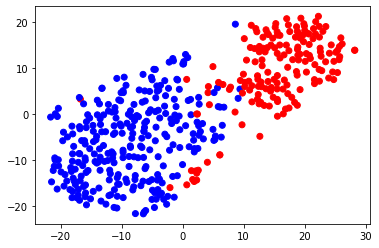

In [42]:
plt.scatter(X_embedded_scaled[:,0], X_embedded_scaled[:,1], c=["red" if i==1 else "blue" for i in train_set["diagnosis"]])

# Standardization pipeline

In [43]:
stand_pipeline = Pipeline([
    ('norm', StandardScaler())
])

# Normalizer pipeline

In [44]:
norm_pipeline = Pipeline([
    ('norm', Normalizer())
])

# Log normalizer pipeline

In [52]:
class LogNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_zeros=True): # no *args or **kargs
        self.drop_zeros = drop_zeros
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.drop_zeros:
            return np.log(X[~(X == 0).any(axis=1)])
        else:
            return np.log(X)

In [54]:
lognorm = LogNormalizer()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f523fef25f8>,
      dtype=object)

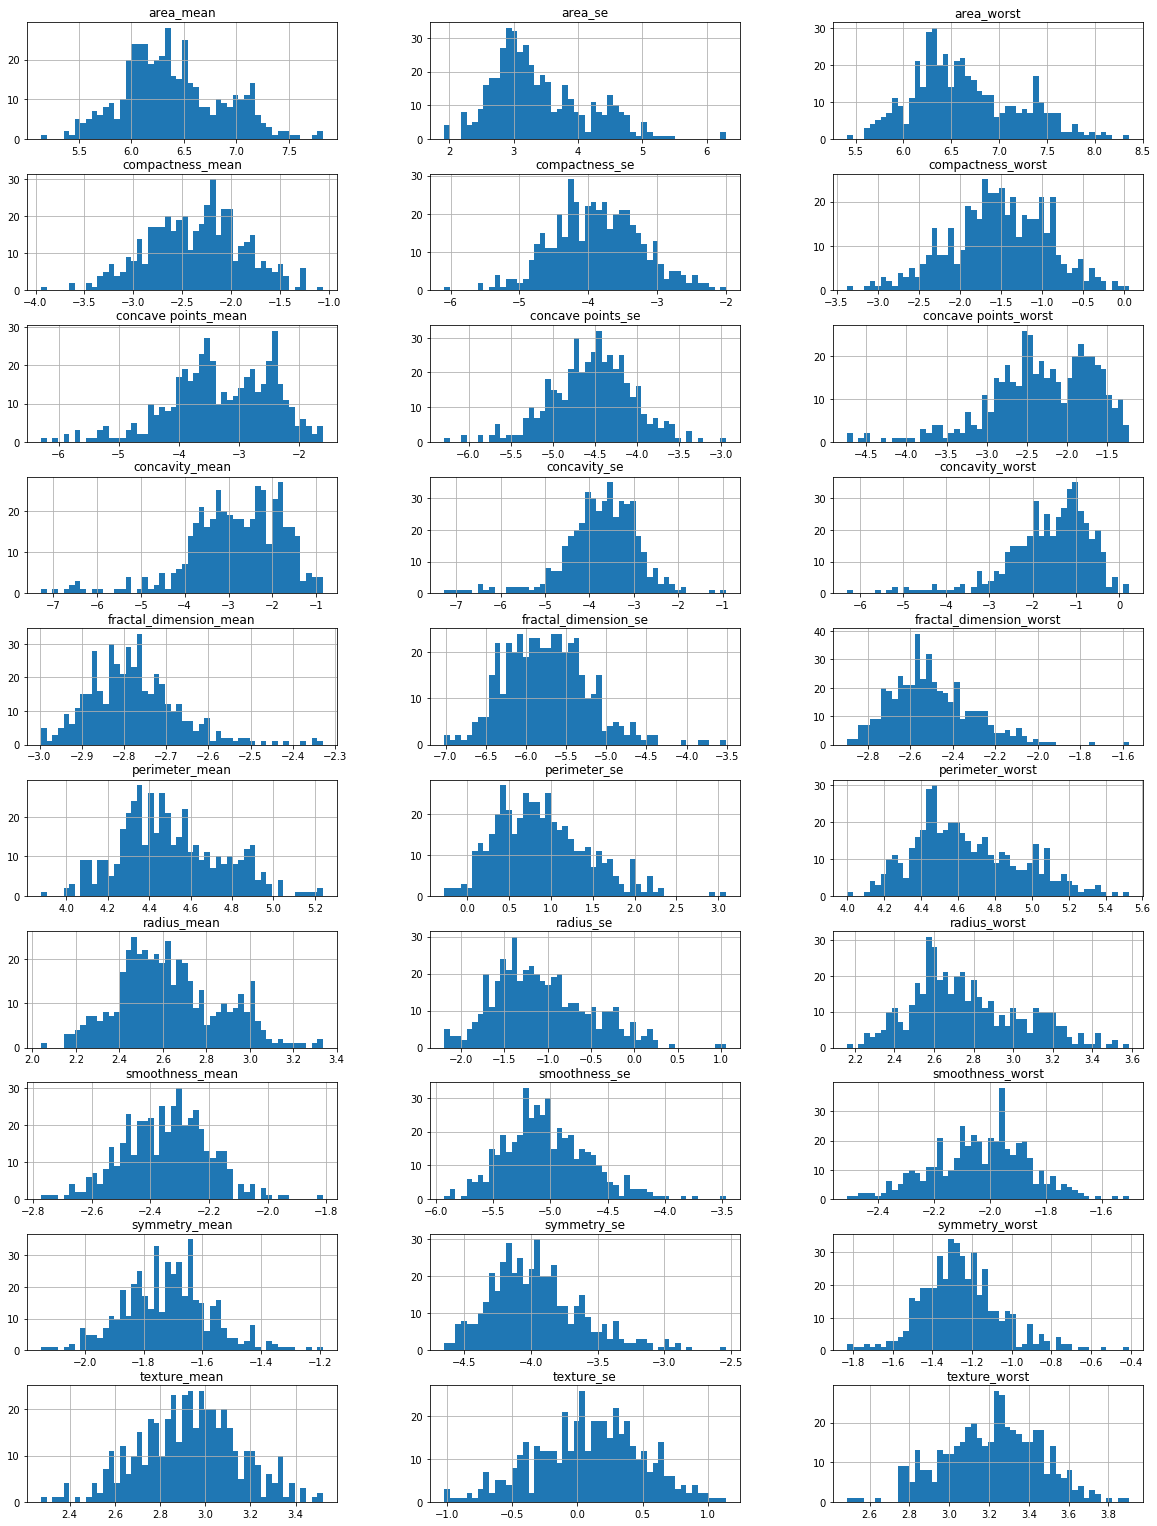

In [55]:
lognorm.fit_transform(train_set.drop(["diagnosis"], axis=1)).hist(figsize=(20,30), bins=50, layout=(11,3))

In [56]:
log_pipeline = Pipeline([
    ('norm', LogNormalizer())
])

# PCA pipeline

In [57]:
pca_pipeline = Pipeline([
        ('dim_red', PCA()) # n_components
    ])

# RandomForestClassifier pipeline

In [58]:
forest_class_pipeline = Pipeline([
    ('model', RandomForestClassifier())
])

# LogisticRegression pipeline

In [59]:
logreg_pipeline = Pipeline ([
    ('model', LogisticRegression())
])

# AdaBoost pipeline

In [60]:
ada_pipeline = Pipeline([
    ('model', AdaBoostClassifier())
])

# Gaussian pipeline

In [61]:
gauss_pipeline = Pipeline([
    ('model', GaussianProcessClassifier())
])

# PassiveAggresive pipeline

In [62]:
aggro_pipeline = Pipeline([
    ('model', PassiveAggressiveClassifier())
])

# Gaussian Naive Bayes

In [63]:
gauss_naive_bayes_pipeline = Pipeline([
    ('model', GaussianNB())
])

# KNeighbors pipeline

In [64]:
kneighbor_pipeline = Pipeline([
    ('model', KNeighborsClassifier())
])

# MLP(NN) pipeline

In [65]:
mlp_pipeline = Pipeline([
    ('model', MLPClassifier())
])

# LinearSVC pipeline

In [66]:
linear_sv_pipeline = Pipeline([
    ('model', LinearSVC())
])

# NuSVC pipeline

In [67]:
nu_sv_pipeline = Pipeline([
    ('model', NuSVC())
])

# SVC pipeline

In [68]:
svc_pipeline = Pipeline([
    ('model', SVC())
])

# Featureselection pipeline

In [69]:
def top_indices(feature_importance, k):
    f_i_series = pd.Series(feature_importance)
    return list(f_i_series[f_i_series.isin(np.sort(feature_importance)[-k:])].index)

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importance, k): # no *args or **kargs
        self.feature_importance = feature_importance
        if type(k) == float:
            k = int(k*len(feature_importance))
        self.k = k
    def fit(self, X, y=None):
        self.top_indices = top_indices(self.feature_importance, self.k)
        return self
    def transform(self, X):
        return X[:, self.top_indices]

In [70]:
k = 0
feature_importance = []
feature_select_pipeline = Pipeline([
    ('feature_select', TopFeatureSelector(feature_importance, k))
])

# RandomizedGridSearch with pipelines

In [71]:
metric = "f1"

In [72]:
pipe = Pipeline([
    ('norm', 'passthrough'),
    ('dim_red', 'passthrough'),
    ('feature_select', 'passthrough'),
    ('model', 'passthrough')
])

In [73]:
params = {
        'norm': ['passthrough', stand_pipeline, norm_pipeline], #issue with logreg labels dont match data 
        'dim_red': ['passthrough', pca_pipeline],
        'model': [forest_class_pipeline, logreg_pipeline, ada_pipeline, gauss_pipeline, aggro_pipeline, 
                  gauss_naive_bayes_pipeline, kneighbor_pipeline, mlp_pipeline,
                  linear_sv_pipeline, nu_sv_pipeline, svc_pipeline]
    }

In [74]:
grid = GridSearchCV(estimator=pipe, param_grid=params, cv=5, verbose=2,
                   return_train_score=True,scoring=metric)

In [75]:
grid.fit(train_set.drop(["diagnosis"], axis=1), train_set["diagnosis"])

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False), norm=passthrough 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False), norm=passthrough, total=   0.2s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False), norm=passthrough, total=   0.2s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
  

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False), norm=passthrough, total=   0.2s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
           

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False), norm=passthrough, total=   0.2s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
           

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=passthrough, total=   0.8s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClas

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=passthrough, total=   0.7s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClas

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=passthrough, total=   1.6s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClas

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=passthrough, total=   0.8s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClas

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=passthrough, total=   0.5s
[CV] dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClas

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
       

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
       

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
       

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
       

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
       

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None, steps=[('norm', Normalizer(copy=True, norm='l2'))],
         verbose=False), total=   0.6s
[CV] dim_red=passt

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None, steps=[('norm', Normalizer(copy=True, norm='l2'))],
         verbose=False), total=   0.8s
[CV] dim_red=passt

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None, steps=[('norm', Normalizer(copy=True, norm='l2'))],
         verbose=False), total=   0.7s
[CV] dim_red=passt

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None, steps=[('norm', Normalizer(copy=True, norm='l2'))],
         verbose=False), total=   0.9s
[CV] dim_red=passt

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Libline

[CV]  dim_red=passthrough, model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False), norm=Pipeline(memory=None, steps=[('norm', Normalizer(copy=True, norm='l2'))],
         verbose=False), total=   0.8s
[CV] dim_red=passt

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False), norm=passthrough, total=   0.1s
[CV] dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=Non

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False), norm=Pipeline(memory=None,
         steps=[('norm',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False), total=   0.0

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Libline

[CV]  dim_red=Pipeline(memory=None,
         steps=[('dim_red',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False), model=Pipeline(memory=None,
         steps=[('model',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_

[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:   45.1s finished
/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('norm', 'passthrough'),
                                       ('dim_red', 'passthrough'),
                                       ('feature_select', 'passthrough'),
                                       ('model', 'passthrough')],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'dim_red': ['passthrough',
                                     Pipeline(memory=None,
                                              steps=[('dim_red',
                                                      PCA(copy=True,
                                                          iterated_power='auto',
                                                          n_components=No...
                                                        shrinking=True,
                                                        tol=0.001,
              

In [76]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('norm',
                 Pipeline(memory=None,
                          steps=[('norm',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('dim_red',
                 Pipeline(memory=None,
                          steps=[('dim_red',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=None, random_state=None,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('feature_select', 'passth...
                                                early_stopping=False,
                                                epsilon=1e-08,
                                                hidden_layer_sizes=(100,),
        

In [77]:
grid.best_score_

0.9741367521367522

In [78]:
grid.cv_results_["mean_test_score"]

array([0.95119485, 0.95389462, 0.95886182, 0.92492127, 0.97208478,
       0.499     , 0.96799306, 0.96799306, 0.95861625, 0.53183793,
       0.95040944, 0.499     , 0.7982576 , 0.95796105, 0.8197339 ,
       0.9219345 , 0.91263212, 0.78520042, 0.91554495, 0.94421483,
       0.88697042, 0.90914101, 0.96463793, 0.83651611, 0.81843676,
       0.96412532, 0.85588726, 0.80490396, 0.92584987, 0.86394478,
       0.88845113, 0.96580278, 0.78658565, 0.94118459, 0.9122224 ,
       0.91776822, 0.93745142, 0.97208478, 0.499     , 0.95012218,
       0.92951967, 0.91874845, 0.53183793, 0.95040944, 0.499     ,
       0.92516513, 0.94196611, 0.86965749, 0.87505981, 0.81042547,
       0.75946084, 0.91554495, 0.94421483, 0.88697042, 0.9527469 ,
       0.97413675, 0.81546031, 0.93001034, 0.96412532, 0.85588726,
       0.86564483, 0.92584987, 0.88321936, 0.90286041, 0.96580278,
       0.90609668])

# Dummy classifier (baseline)

In [79]:
stratified = DummyClassifier()
stratified.fit(train_set.drop(["diagnosis"], axis=1), train_set["diagnosis"])
dummy_preds = stratified.predict(train_set.drop(["diagnosis"], axis=1))
if metric == "f1":
    print(f1_score(train_set["diagnosis"], dummy_preds))

0.35258358662613976


/home/jonas/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


# Testset

In [80]:
y_pred = grid.predict(X_test)

In [88]:
y_test_bool = y_test=="M"

y_test_num = y_test_bool.astype(int)

In [90]:
f1_score(y_test_num, y_pred)

0.963855421686747